# HW1_1:Multiple  liner regression example (商品的銷售額與電視收音機報紙廣告投入的相關性)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# step1: 讀取資料

In [2]:
df=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
type(df)

pandas.core.frame.DataFrame

#feature : TV/radio/newspaper(單位:千元)
#feeback : sale (對應產品的銷量)

In [3]:
#df.set_index("Unnamed: 0" , inplace=True)
print(df.info())
len(df)
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(df.columns)
df.shape

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


(200, 5)

In [5]:
TV = df.TV
radio = df.radio
newspaper =df.newspaper
sales = df.sales 

廣告對於銷量的分布

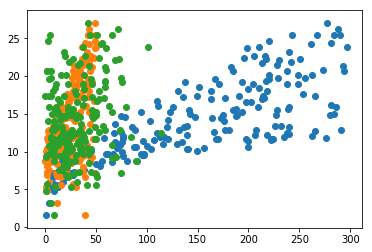

In [6]:
plt.scatter(TV,sales)
plt.scatter(radio,sales)
plt.scatter(newspaper,sales)
plt.show()

# step2 : fature engineering(data preprocessing-data,outline,normalization,find efficient feature, split training and value )

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


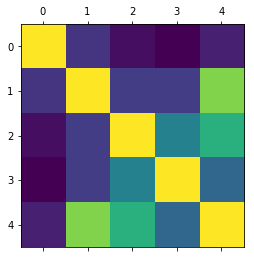

In [7]:
#資料的相關性
print(df.corr())
plt.matshow(df.corr())
plt.show()

# step3: build prediction model

In [8]:
from sklearn.linear_model import LinearRegression as LR
model =LR()
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


# 需要x作為特徵矩正，y維numpy的向量

In [9]:
feature_cols=['TV','radio','newspaper']
x=df[feature_cols]
#x=df[['TV','radio','newspaper']]
print(x.head())
print (x.shape)
print(type(x))

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
(200, 3)
<class 'pandas.core.frame.DataFrame'>


In [10]:
y =df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# build train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [12]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [13]:
model_fit = model.fit(X_train,y_train)
print(model_fit)
print(model.intercept_)
print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
2.8769666223179318
[0.04656457 0.17915812 0.00345046]


# y=0.0465*TV+0.179*radio+0.003*newspaper+2.877
由上面得知

# step4: 預測結果

In [14]:
#預測test set
y_pred = model.predict(X_test)
print(y_pred)
print(type(y_pred))

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]
<class 'numpy.ndarray'>


In [15]:
print(type(y_pred),type(y_test))
print(len(y_pred),len(y_test))
print(y_pred.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
50 50
(50,) (50,)


In [16]:
#計算test set 的RMSE
from sklearn import metrics
#sum_mean=0
#for i in range(len(y_pred)):
#    sum_mean+=(y_pred[i]-y_test.values[i])**2
#sum_erro=np.sqrt(sum_mean/50)
#print ("RMSE: ", sum_erro)
print ("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE:  1.404651423032895


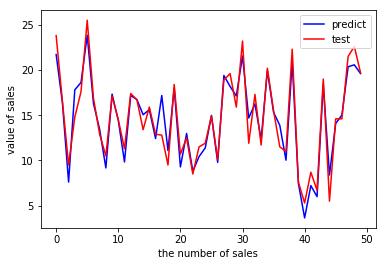

In [17]:
#預測值與誤差值的關係圖
plt.figure()

plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

D:\Users\toke8\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


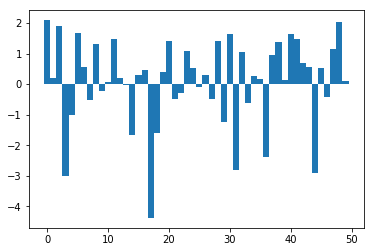

In [18]:
#test 預測值與實際的差異
fig, ax = plt.subplots()
x = np.arange(len(y_test))
ax.bar(x,y_test-y_pred,width=1)
fig.show()

In [19]:
sale_pred = model.predict([[200,32,66]]) #TV/radio/newspaper
print ("predicion sales: ", sale_pred)

predicion sales:  [18.15067079]
